In [291]:
import pandas as pd
import numpy as np

In [292]:
data_train = pd.read_csv('train.csv')
y = data_train.iloc[:,1]
data_train = data_train.drop("Survived",axis=1)

data_test = pd.read_csv('test.csv')

In [293]:
data = pd.concat([data_train, data_test], ignore_index=True, sort =False)

In [294]:
data.columns[data_train.isnull().any()]

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [295]:
data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [296]:
cabin_types = data.Cabin.values.tolist()
for i in range(0,len(cabin_types)):
    if type(cabin_types[i])!=float:
        if cabin_types[i][0] in ("A","B","C","D","E","F","G"):
            cabin_types[i]=cabin_types[i][0]
        elif cabin_types[i][0]=="T":
            cabin_types[i]="A"
            

In [297]:
from collections import Counter

cabin_population = Counter(cabin_types)

In [298]:
data['Cabin']=cabin_types

In [299]:
for i in cabin_population.keys():
    print(i , Counter(data[data.Cabin == i].Sex.values))

nan Counter()
C Counter({'male': 48, 'female': 46})
E Counter({'male': 22, 'female': 19})
G Counter({'female': 5})
D Counter({'male': 23, 'female': 23})
A Counter({'male': 19, 'female': 4})
B Counter({'female': 36, 'male': 29})
F Counter({'male': 13, 'female': 8})


In [300]:
names = data.Name.values

In [301]:
l1 = []
for i in names:
    j=i.split(",")
#     print(j)
    j=j[1].split(".")
    print(j[0][1:])
    l1.append(j[0][1:])

Mr
Mrs
Miss
Mrs
Mr
Mr
Mr
Master
Mrs
Mrs
Miss
Miss
Mr
Mr
Miss
Mrs
Master
Mr
Mrs
Mrs
Mr
Mr
Miss
Mr
Miss
Mrs
Mr
Mr
Miss
Mr
Don
Mrs
Miss
Mr
Mr
Mr
Mr
Mr
Miss
Miss
Mrs
Mrs
Mr
Miss
Miss
Mr
Mr
Miss
Mr
Mrs
Master
Mr
Mrs
Mrs
Mr
Mr
Miss
Mr
Miss
Master
Mr
Miss
Mr
Master
Mr
Master
Mrs
Mr
Miss
Mr
Mr
Miss
Mr
Mr
Mr
Mr
Mr
Mr
Master
Miss
Mr
Mr
Miss
Mr
Miss
Mrs
Mr
Mr
Miss
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Mrs
Mr
Miss
Mr
Mr
Mr
Mr
Mr
Miss
Mr
Mr
Miss
Mr
Miss
Mr
Miss
Miss
Mr
Mr
Mr
Mr
Miss
Mr
Mr
Mr
Miss
Mr
Master
Mr
Mr
Miss
Mr
Mr
Mr
Mrs
Mrs
Mr
Mr
Miss
Mr
Mr
Mr
Mrs
Miss
Mrs
Mr
Mr
Mr
Mr
Miss
Mr
Rev
Rev
Mrs
Mr
Mr
Mr
Mr
Miss
Mr
Mr
Master
Mr
Mrs
Mr
Mr
Master
Master
Mrs
Mrs
Mr
Mr
Mr
Master
Miss
Mr
Mr
Mr
Master
Miss
Mr
Mr
Miss
Mr
Master
Master
Miss
Mr
Mrs
Mr
Mr
Mr
Mrs
Mr
Miss
Master
Mrs
Miss
Mr
Mr
Miss
Miss
Mr
Mr
Mr
Mr
Mr
Miss
Mr
Mr
Miss
Mr
Mr
Miss
Mr
Mr
Mr
Miss
Miss
Mr
Miss
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Miss
Mrs
Mr
Mr
Miss
Mr
Miss
Mr
Miss
Mr
Mr
Miss
Miss
Mr
Mr
Mr
Dr
Miss
Mrs
Mr
Rev
Mr
Mrs
Mr
Mr
Mrs
Mrs
Mrs
Miss
Miss
Mrs
M

In [302]:
data["title"]=l1

In [303]:
Counter(data.title.values)

Counter({'Mr': 757,
         'Mrs': 197,
         'Miss': 260,
         'Master': 61,
         'Don': 1,
         'Rev': 8,
         'Dr': 8,
         'Mme': 1,
         'Ms': 2,
         'Major': 2,
         'Lady': 1,
         'Sir': 1,
         'Mlle': 2,
         'Col': 4,
         'Capt': 1,
         'the Countess': 1,
         'Jonkheer': 1,
         'Dona': 1})

In [304]:
data[data.title=="Dona"]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C,C,Dona


In [305]:
data[data.Name=="Ms"]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title


In [306]:
name = data.title.values

In [307]:
for i in range(len(name)):
    if name[i]=="Jonkheer": 
        name[i]="Mr"
    elif name[i] in ("Mlle","Ms","Mme", "Dona"):
        name[i]="Miss"
    elif name[i] in ("Don","Rev","Major","Sir","Col","Capt", "Dr"):
        name[i]="Special"
    elif name[i] in ("Lady","the Countess"):
        name[i]="Mrs"

In [308]:
Counter(name)

Counter({'Mr': 758, 'Mrs': 199, 'Miss': 266, 'Master': 61, 'Special': 25})

In [309]:
data["title"]=name
data = data.drop("Name",axis=1)

In [310]:
data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,female,38.0,1,0,PC 17599,71.2833,C,C,Mrs
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,female,35.0,1,0,113803,53.1000,C,S,Mrs
4,5,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr
1305,1306,1,female,39.0,0,0,PC 17758,108.9000,C,C,Miss
1306,1307,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr
1307,1308,3,male,NaN,0,0,359309,8.0500,NaN,S,Mr


In [311]:
# data['Ticket'] = data['Ticket'].str.extract('(\d+)').astype(float)

In [312]:
data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,female,38.0,1,0,PC 17599,71.2833,C,C,Mrs
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,female,35.0,1,0,113803,53.1000,C,S,Mrs
4,5,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr
1305,1306,1,female,39.0,0,0,PC 17758,108.9000,C,C,Miss
1306,1307,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr
1307,1308,3,male,NaN,0,0,359309,8.0500,NaN,S,Mr


In [313]:
data_tickets = data.Ticket.values
lst21= []
lst22=[]
import re

for i in data_tickets:
    if len(i.split(" "))>1:
        i=i.split(" ")
        i="".join(re.findall("[a-zA-Z0-9]+", i[0][:]))
#         if "SOTON" in i:
#             i="ST"
        lst21.append(i)
    else:
        lst21.append(i[0]+""+str(len(i)))
        

lst21

['A5',
 'PC',
 'STONO2',
 '16',
 '36',
 '36',
 '15',
 '36',
 '36',
 '26',
 'PP',
 '16',
 'A5',
 '36',
 '36',
 '26',
 '36',
 '26',
 '36',
 '24',
 '26',
 '26',
 '36',
 '16',
 '36',
 '36',
 '24',
 '15',
 '36',
 '36',
 'PC',
 'PC',
 '36',
 'CA',
 'PC',
 '16',
 '24',
 'A5',
 '36',
 '24',
 '74',
 '15',
 '36',
 'SCParis',
 '36',
 'SCA4',
 '36',
 '15',
 '24',
 '36',
 '37',
 'A4',
 'PC',
 '24',
 '16',
 '15',
 'CA',
 '24',
 'CA',
 'CA',
 '24',
 '16',
 '35',
 '36',
 'PC',
 '24',
 'CA',
 'SP',
 '37',
 '36',
 'CA',
 'CA',
 'SOC',
 '24',
 '14',
 '36',
 '36',
 '36',
 '26',
 '36',
 '36',
 '36',
 '36',
 '16',
 'SOC',
 '37',
 'WC',
 'SOTONOQ',
 '15',
 '36',
 '36',
 '36',
 'WEP',
 'CA',
 '36',
 '36',
 'PC',
 'PC',
 '26',
 '26',
 '36',
 '36',
 '35',
 '74',
 '37',
 '36',
 '36',
 '36',
 '36',
 '36',
 '16',
 '24',
 '36',
 '44',
 '24',
 'STONO',
 '36',
 '15',
 'PC',
 '36',
 'SOC',
 'A4',
 '26',
 '25',
 '35',
 '24',
 '36',
 'C',
 '24',
 '36',
 '36',
 'SOTONOQ',
 'A5',
 '26',
 'CA',
 'SCPARIS',
 '15',
 '16',
 '

In [314]:
data["Ticket"]=lst21

In [315]:
data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,3,male,22.0,1,0,A5,7.2500,NaN,S,Mr
1,2,1,female,38.0,1,0,PC,71.2833,C,C,Mrs
2,3,3,female,26.0,0,0,STONO2,7.9250,NaN,S,Miss
3,4,1,female,35.0,1,0,16,53.1000,C,S,Mrs
4,5,3,male,35.0,0,0,36,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,male,NaN,0,0,A5,8.0500,NaN,S,Mr
1305,1306,1,female,39.0,0,0,PC,108.9000,C,C,Miss
1306,1307,3,male,38.5,0,0,SOTONOQ,7.2500,NaN,S,Mr
1307,1308,3,male,NaN,0,0,36,8.0500,NaN,S,Mr


In [316]:
data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,3,male,22.0,1,0,A5,7.2500,NaN,S,Mr
1,2,1,female,38.0,1,0,PC,71.2833,C,C,Mrs
2,3,3,female,26.0,0,0,STONO2,7.9250,NaN,S,Miss
3,4,1,female,35.0,1,0,16,53.1000,C,S,Mrs
4,5,3,male,35.0,0,0,36,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,male,NaN,0,0,A5,8.0500,NaN,S,Mr
1305,1306,1,female,39.0,0,0,PC,108.9000,C,C,Miss
1306,1307,3,male,38.5,0,0,SOTONOQ,7.2500,NaN,S,Mr
1307,1308,3,male,NaN,0,0,36,8.0500,NaN,S,Mr


In [317]:
data.loc[data.title=="Miss","Age"] = data[data.title=="Miss"].groupby(['Ticket'])['Age'].apply(lambda x: x.fillna(x.median()))

In [318]:
data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,3,male,22.0,1,0,A5,7.2500,NaN,S,Mr
1,2,1,female,38.0,1,0,PC,71.2833,C,C,Mrs
2,3,3,female,26.0,0,0,STONO2,7.9250,NaN,S,Miss
3,4,1,female,35.0,1,0,16,53.1000,C,S,Mrs
4,5,3,male,35.0,0,0,36,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,male,NaN,0,0,A5,8.0500,NaN,S,Mr
1305,1306,1,female,39.0,0,0,PC,108.9000,C,C,Miss
1306,1307,3,male,38.5,0,0,SOTONOQ,7.2500,NaN,S,Mr
1307,1308,3,male,NaN,0,0,36,8.0500,NaN,S,Mr


In [319]:
data['Age'] = data.groupby(['title'])['Age'].apply(lambda x: x.fillna(x.median()))

In [320]:
data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,3,male,22.0,1,0,A5,7.2500,NaN,S,Mr
1,2,1,female,38.0,1,0,PC,71.2833,C,C,Mrs
2,3,3,female,26.0,0,0,STONO2,7.9250,NaN,S,Miss
3,4,1,female,35.0,1,0,16,53.1000,C,S,Mrs
4,5,3,male,35.0,0,0,36,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,male,29.0,0,0,A5,8.0500,NaN,S,Mr
1305,1306,1,female,39.0,0,0,PC,108.9000,C,C,Miss
1306,1307,3,male,38.5,0,0,SOTONOQ,7.2500,NaN,S,Mr
1307,1308,3,male,29.0,0,0,36,8.0500,NaN,S,Mr


In [321]:
data.Fare = data.Fare.fillna(data.Fare.median())

In [322]:
data.columns[data.isna().any()]

Index(['Cabin', 'Embarked'], dtype='object')

In [323]:
data['Family'] =  data["Parch"] + data["SibSp"] + 1


In [324]:
fam = data['Family'].values
alone = [0 for i in range(1309)]


In [325]:
for i in range(len(alone)):
    if(fam[i]==1):
        alone[i]=1
        fam[i]=0

In [326]:
data['Family'] = fam
data['isAlone'] = alone

In [327]:
data = data.drop(["Ticket","Cabin","PassengerId",'Parch','SibSp'], axis=1)

In [328]:
data['Embarked'] = data['Embarked'].fillna("S")

In [329]:
data = pd.get_dummies(data)

In [330]:
data = data.drop(["Fare"], axis=1)

In [331]:
data

,Pclass,Age,Family,isAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,title_Master,title_Miss,title_Mr,title_Mrs,title_Special
0,3,22.0,2,0,0,1,0,0,1,0,0,1,0,0
1,1,38.0,2,0,1,0,1,0,0,0,0,0,1,0
2,3,26.0,0,1,1,0,0,0,1,0,1,0,0,0
3,1,35.0,2,0,1,0,0,0,1,0,0,0,1,0
4,3,35.0,0,1,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,29.0,0,1,0,1,0,0,1,0,0,1,0,0
1305,1,39.0,0,1,1,0,1,0,0,0,1,0,0,0
1306,3,38.5,0,1,0,1,0,0,1,0,0,1,0,0
1307,3,29.0,0,1,0,1,0,0,1,0,0,1,0,0


In [332]:
X_train = data.iloc[:891,:]
X_test = data.iloc[891:,:]

In [333]:
X_train.tail()

,Pclass,Age,Family,isAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,title_Master,title_Miss,title_Mr,title_Mrs,title_Special
886,2,27.0,0,1,0,1,0,0,1,0,0,0,0,1
887,1,19.0,0,1,1,0,0,0,1,0,1,0,0,0
888,3,21.0,4,0,1,0,0,0,1,0,1,0,0,0
889,1,26.0,0,1,0,1,1,0,0,0,0,1,0,0
890,3,32.0,0,1,0,1,0,1,0,0,0,1,0,0


In [98]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [837]:
rf=RandomForestClassifier(n_estimators=100,random_state=21)
ad = GradientBoostingClassifier(n_estimators=1000)

In [838]:
rf.fit(X_train,y)
ad.fit(X_train,y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=1000,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [839]:
X_train

,Pclass,Age,Fare,Family,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Name_Special,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,7.2500,2,0,0,1,0,0,0,1,0,0,1
758,1,38.0,71.2833,2,0,0,0,1,0,1,0,1,0,0
956,3,26.0,7.9250,1,0,1,0,0,0,1,0,0,0,1
759,1,35.0,53.1000,2,0,0,0,1,0,1,0,0,0,1
1,3,35.0,8.0500,1,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303,2,27.0,13.0000,1,0,0,0,0,1,0,1,0,0,1
1141,1,19.0,30.0000,1,0,1,0,0,0,1,0,0,0,1
1142,3,22.0,23.4500,4,0,1,0,0,0,1,0,0,0,1
516,1,26.0,30.0000,1,0,0,1,0,0,0,1,1,0,0


In [334]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_train, y, test_size=0.3, random_state = 42)

In [841]:
pred1=rf.predict(x_train)

In [842]:
from sklearn.metrics import accuracy_score

In [843]:
accuracy_score(pred1,y_train)

0.9759229534510433

Best Hyper Parameters:  {'max_depth': 7, 'n_estimators': 90, 'random_state': 42}
Best Score: 0.828
RF accuracy: 0.795
AUC: 0.864


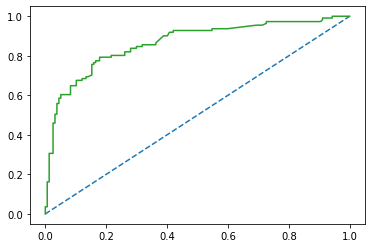

In [335]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
from matplotlib import rcParams
import seaborn as sns
import re
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix


#from sklearn.cross_validation import KFold, cross_val_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import roc_curve, accuracy_score, make_scorer, roc_auc_score
from sklearn.model_selection import GridSearchCV

from sklearn import ensemble
from sklearn import tree


RF = RandomForestClassifier()
RF_params = {
          'n_estimators':[n for n in range(60,130,10)],
          'max_depth':[n for n in range(2, 8)],
          #'min_samples_leaf': [n for n in range(2, 6, 2)],
          'random_state' : [42]
            }

RF_model = GridSearchCV(RF, param_grid = RF_params, cv = 3, n_jobs = -1)
RF_model.fit(x_train, y_train)

print("Best Hyper Parameters: ", RF_model.best_params_)
print("Best Score: " + '%.3f' % RF_model.best_score_)

RF_predictions = RF_model.predict(x_test)
RF_accuracy = accuracy_score(y_test, RF_predictions)
print("RF accuracy: " + '%.3f' % RF_accuracy)

# Area under the curve probability score
RF_probs = RF_model.predict_proba(x_test)
RF_probs = RF_probs[:, 1]
RF_auc = roc_auc_score(y_test, RF_probs)
print('AUC: %.3f' % RF_auc)

# AUC plot
RF_fpr, RF_tpr, RF_thresholds = roc_curve(y_test, RF_probs)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(RF_fpr, RF_tpr, color = 'tab:green');

Best Hyper Parameters:  {'max_depth': 2, 'n_estimators': 120, 'random_state': 42}
Best Score: 0.844
GBT accuracy: 0.817
AUC: 0.880


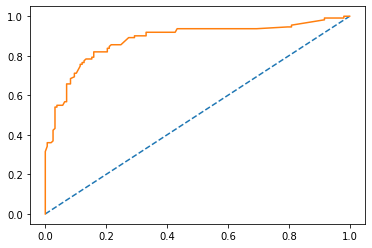

In [336]:

GBT = ensemble.GradientBoostingClassifier()
GBT_params = {
          'n_estimators':[n for n in range(100,200,10)],
          'max_depth':[n for n in range(2, 6)],
          #'min_samples_leaf': [n for n in range(2, 6, 2)],
          'random_state' : [42]
             }

GBT_model = GridSearchCV(GBT, param_grid = GBT_params, cv = 7, n_jobs = -1)
GBT_model.fit(x_train, y_train)
print("Best Hyper Parameters: ",GBT_model.best_params_)
print("Best Score: " + '%.3f' % GBT_model.best_score_)

GBT_predictions = GBT_model.predict(x_test)
GBT_accuracy = accuracy_score(y_test, GBT_predictions)
print("GBT accuracy: " + '%.3f' % GBT_accuracy)

# Area under the curve probability score
GBT_probs = GBT_model.predict_proba(x_test)
GBT_probs = GBT_probs[:, 1]
GBT_auc = roc_auc_score(y_test, GBT_probs)
print('AUC: %.3f' % GBT_auc)

# AUC plot
GBT_fpr, GBT_tpr, GBT_thresholds = roc_curve(y_test, GBT_probs)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(GBT_fpr, GBT_tpr, color = 'tab:orange');


Scores :
Random Forest AUC: 0.864
Random Forest Best Score: 0.828
RF accuracy: 0.795

Gradient Boosting Classifier AUC: 0.880
Gradient Boosting Classifier Best Score: 0.844
GBT accuracy: 0.817


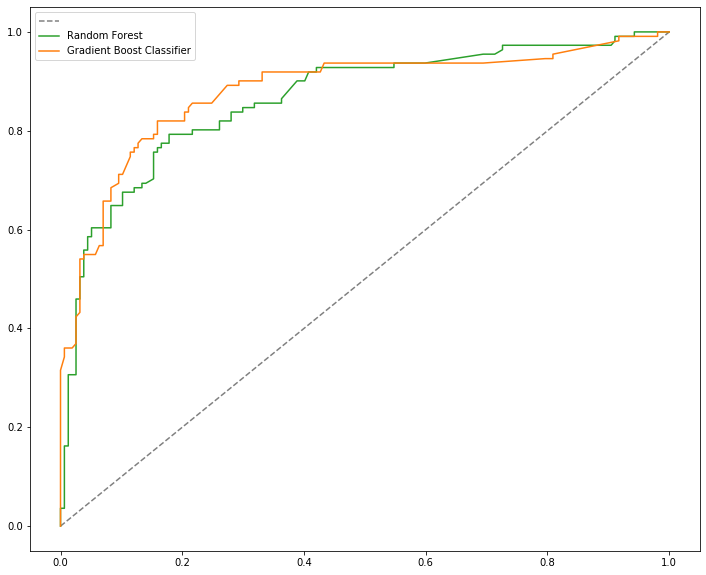

In [337]:
#Area under the curve probability score
b = '\033[1m'
ub = '\033[0m'

pyplot.figure(figsize=[12,10])
print(b + 'Scores :')
print(ub + 'Random Forest AUC: ' + b +  '%.3f' % RF_auc)
print(ub + "Random Forest Best Score: "+ b +   '%.3f' % RF_model.best_score_)
print(ub + "RF accuracy: " + b +   '%.3f' % RF_accuracy)


print(ub + '\nGradient Boosting Classifier AUC: ' + b +  '%.3f' % GBT_auc)
print(ub + "Gradient Boosting Classifier Best Score: " + b +   '%.3f' % GBT_model.best_score_)
print(ub + "GBT accuracy: "+ b +   '%.3f' % GBT_accuracy)


# AUC plot
pyplot.plot([0, 1], [0, 1], linestyle='--', color = 'grey')
pyplot.plot(RF_fpr, RF_tpr, color = 'tab:green')
pyplot.plot(GBT_fpr, GBT_tpr, color = 'tab:orange')

pyplot.legend(('', 'Random Forest', 
                   'Gradient Boost Classifier'))

pyplot.show()

In [338]:
predict_RF = RF_model.predict(X_test)
predict_GBT = GBT_model.predict(X_test)

submit_RF = pd.DataFrame({'PassengerId':data_test['PassengerId'],'Survived':predict_RF})
submit_GBT = pd.DataFrame({'PassengerId':data_test['PassengerId'],'Survived':predict_GBT})


#creating submission file
filename_RF = 'Titanic Prediction RF.csv'
submit_RF.to_csv(filename_RF,index=False)
print('Saved file: ' + filename_RF)

filename_GBT = 'Titanic Prediction GBT.csv'
submit_GBT.to_csv(filename_GBT,index=False)
print('Saved file: ' + filename_GBT)

Saved file: Titanic Prediction RF.csv
Saved file: Titanic Prediction GBT.csv


In [764]:
lat = pd.DataFrame(
    {'PassengerId': data_test.iloc[:,0],
     'Survived': pred1
    })
# sub2 = pd.DataFrame(
#     {'PassengerId': data_test.iloc[:,0],
#      'Survived': pred2
#     })


In [765]:
sub2.to_csv('lat1.csv',index=False)